<table style="width:100%;font-size:13pt" background="images/muimc.jpg">
        <tr>
            <td colspan="2" style="border: 1px #0098cd solid; text-align:center; background-color:#E6F4F9; color:#0098CD">
                <b>Máster Universitario en Ingeniería Matemática y Computación</b>
            </td>
    </tr>
        <tr style="width:100%">
            <td rowspan="2" style="border: 1px #0098cd solid; background-color:#E6F4F9; color:#0098CD; width:35%">
                <center>Técnicas Multivariantes y Machine Learning</center>
            </td>
            <td style="border: 1px #0098cd solid; text-align:left; background-color:#E6F4F9; color:#0098CD">Tema 4: Técnicas de regresión</td>
        </tr>
        <tr>
            <td style="border: 1px #0098cd solid; text-align:left; background-color:#E6F4F9; color:#0098CD">Ejemplo 1 
            </td>
        </tr>        
</table>

Text(0, 0.5, 'gramos')

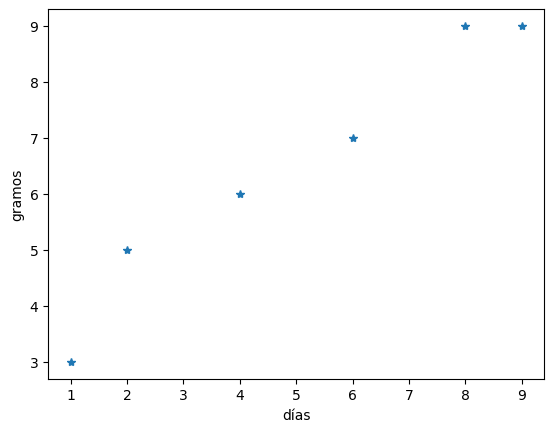

In [3]:
import numpy as np # Librería numérica
import matplotlib.pyplot as plt # Para crear gráficos con matplotlib
from sklearn.linear_model import LinearRegression # Regresión Lineal con scikit-learn

dias   = [1, 2, 4, 6, 8, 9]
gramos = [3, 5, 6, 7, 9, 9]

xdata = np.asarray(dias)
ydata = np.asarray(gramos)

plt.plot(xdata, ydata, '*')
plt.xlabel("días")
plt.ylabel("gramos")

In [16]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression

regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression

# instruimos a la regresión lineal que aprenda de los datos (x, y)
regresion_lineal.fit(xdata.reshape(-1, 1), ydata)  

# vemos los parámetros que ha estimado la regresión lineal
print('Coeficiente = ' + str(regresion_lineal.coef_) + ', Intercepto = ' + str(regresion_lineal.intercept_))

Coeficiente = [0.71153846], Intercepto = 2.942307692307692


In [15]:
print("y = ", regresion_lineal.intercept_, " + ", regresion_lineal.coef_, "X")

y =  2.942307692307694  +  [0.71153846] X


In [16]:
# vamos a predicir y = regresion_lineal(5)
nuevo_x = np.array([5]) 
prediccion = regresion_lineal.predict(nuevo_x.reshape(-1,1))
print("Número de gramos en el día 5: ", prediccion)

Número de gramos en el día 5:  [6.5]


In [17]:
# vamos a predicir y = regresion_lineal(15)
nuevo2_x = np.array([15]) 
prediccion2 = regresion_lineal.predict(nuevo2_x.reshape(-1,1))
print("Número de gramos en el día 15: ", prediccion2)

Número de gramos en el día 15:  [13.61538462]


In [18]:
# importamos el cálculo del error cuadrático medio (MSE)
from sklearn.metrics import mean_squared_error

# Predecimos los valores y para los datos usados en el entrenamiento
prediccion_entrenamiento = regresion_lineal.predict(xdata.reshape(-1,1))

# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = ydata, y_pred = prediccion_entrenamiento)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 0.1955128205128205
Raíz del Error Cuadrático Medio (RMSE) = 0.44216831694821884


In [19]:
# calculamos el coeficiente de determinación R2
r2 = regresion_lineal.score(xdata.reshape(-1,1), ydata)
print('Coeficiente de Determinación R2 = ' + str(r2))

Coeficiente de Determinación R2 = 0.9573426573426573


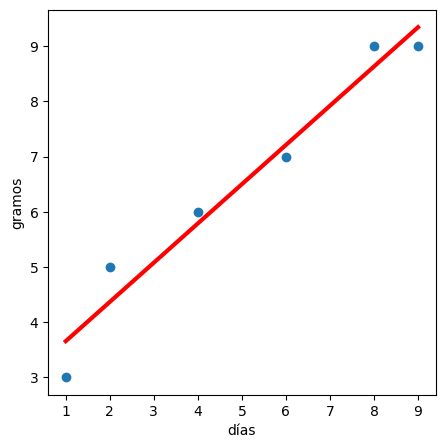

In [20]:
# Obtener valores modelo

# Representar x e y
fig = plt.figure(figsize=(5,5))
plt.scatter(xdata, ydata)

x = xdata.reshape(-1,1)

# Representar la recta de regresión
y_pred = regresion_lineal.predict(x)
plt.plot(x, y_pred, color='red', linewidth=3)

# Definir ejes
plt.xlabel("días")
plt.ylabel("gramos")

# Mostrar gráfico
plt.show()

In [21]:
# la recta debe pasar por el punto:
print("(", np.mean(dias), " ,", np.mean(gramos), ")")

( 5.0  , 6.5 )


In [22]:
# calcular sigma2
print("Varianza del modelo, s2: %.2f"% mean_squared_error(ydata, y_pred))

Varianza del modelo, s2: 0.20


In [23]:
# estimador de la varianza por MLE (método de máxima verosimilitud)
y_resta = (ydata - y_pred) ** 2
sum(y_resta)/6

0.1955128205128205

In [24]:
# estimador de la varianza por OLS (mínimos cuadrados ordinarios)
y_resta = (ydata - y_pred) ** 2
sum(y_resta)/4 # 6-2

0.2932692307692308

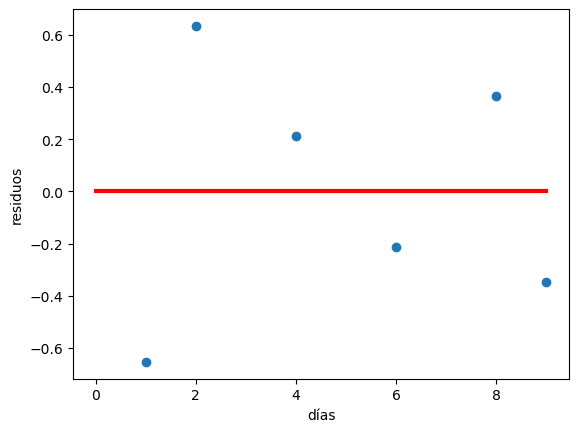

In [25]:
# obtener residuos
residuos = ydata - y_pred
plt.scatter(x, residuos)
plt.xlabel("días")
plt.ylabel("residuos")
plt.plot([0, max(xdata)], [0, 0], color = 'red', linewidth = 3)
plt.show()

In [26]:
import scipy.stats as stats

# se realiza la prueba S-W
sh_result = stats.shapiro(residuos)

# dar formato a la salida
print("Test Shapiro-Wilk, p.valor: %5.5f" %(sh_result.pvalue))
print("Como p.valor > 0.05, no se rechaza la hipótesis nula y se da normalidad en los residuos.")

Test Shapiro-Wilk, p.valor: 0.87751
Como p.valor > 0.05, no se rechaza la hipótesis nula y se da normalidad en los residuos.


In [27]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

m1 = sm.OLS(ydata, sm.add_constant(x)).fit()
bp1 = sms.het_breuschpagan(resid = m1.resid, exog_het = m1.model.exog)[1]
print("El resultado del test Breusch-Pagan es: p.valor = %5.3f"%(bp1))
print("Como p.valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.")

El resultado del test Breusch-Pagan es: p.valor = 0.076
Como p.valor > 0.05, no se rechaza la hipótesis nula y se da homocedasticidad.


In [28]:
# calcular ICbeta1

# calcular numerador sb1^2
s2 = sum(y_resta)/(len(ydata)-2)

# calcular denominador sb1^2
den = np.var(x) * len(x)

# calcular sb1
sb1 = (s2/den) ** 0.5
amplitud = 1.96 * sb1
print("El IC al 0.95 de b1 es:", regresion_lineal.coef_, "+/-", amplitud)
print("El intervalo de confianza no contiene al 0 para beta_1, luego, la variable es significativa.")

El IC al 0.95 de b1 es: [0.71153846] +/- 0.14719316696901003
El intervalo de confianza no contiene al 0 para beta_1, luego, la variable es significativa.


In [29]:
0.71153846+0.14719316696901003

0.85873162696901

In [30]:
0.71153846-0.14719316696901003

0.56434529303099

Fin